In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/-coffeemakerclassification/coffee_maker.csv


# **Loading the dataset**

In [2]:
all_data = pd.read_csv('/kaggle/input/-coffeemakerclassification/coffee_maker.csv')
all_data.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


# **Preprocessing**

In [3]:
# creating a label column based on the product ratings. 
# Negative sentiment is the outcome of interest. 
# Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment

all_data['label'] = all_data.apply(lambda row: row.rating>3.0,axis=1)
all_data['label'] = all_data['label'].astype(int)
all_data

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...,0
...,...,...,...,...,...,...
4995,"February 4, 2014",shashi,5.0,NaN,Our Mr. Coffee machine stopped working one day...,1
4996,"May 2, 2019",Connie Krusi,1.0,NaN,This is the second generation of this product ...,0
4997,"August 28, 2014",KL,5.0,NaN,Wow works great and bought it for a bargain wi...,1
4998,"December 16, 2019",Nancy,2.0,NaN,Doesn’t brew correctly need to start to get al...,0


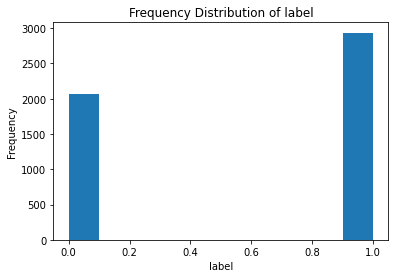

In [4]:
# Assessing label class distribution

plt.hist(all_data['label'])
plt.gca().set(title = 'Frequency Distribution of label',ylabel='Frequency',xlabel='label')
plt.show()

As seen from the above histogram, we do not have any class imbalance problem here and this is good distribution of the target variable.